<a href="https://colab.research.google.com/github/KyoungmiKwon/Bigdata_Training_at_ITwill/blob/main/Machine_Learning/ML21_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   IMDB 데이터 셋을 다운로드 - 가장 자주 사용되는 500개의 어휘 사전을 사용.
*   각 샘플(리뷰)의 최대 단어 숫자가 100이 되도록 자르거나 패딩.
*   LSTM 순환 층을 2개를 연결하는 모델을 생성
    *   Input --> Embedding --> LSTM  --> LSTM --> Output
        *   LSTM 층의 unit 개수 = 16
        *   LSTM 층의 dropout 비율 = 0.3
*   모델 컴파일
*   모델 훈련
*   학습 곡선 - 손실 곡선, 정확도 곡선
*   모델 평가

# import

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Self solution

## 데이터로드

IMDB 데이터 셋을 다운로드 - 가장 자주 사용되는 500개의 어휘 사전을 사용.

In [12]:
# 데이터
(x_tr_f, y_tr_f),(x_ts,y_ts) = keras.datasets.imdb.load_data(num_words=500)
# 어휘 사전을 로드
word_index = keras.datasets.imdb.get_word_index()

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [13]:
x_tr, x_val, y_tr, y_val = train_test_split(x_tr_f,y_tr_f,
                                            test_size = 0.2,
                                            stratify= y_tr_f,
                                            random_state = 42)

## 데이터 정제

각 샘플(리뷰)의 최대 단어 숫자가 100이 되도록 자르거나 패딩.

In [14]:
x_tr_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_tr,maxlen=100)
x_val_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_val, maxlen=100)
x_ts_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_ts, maxlen=100)

In [15]:
x_tr.shape,x_tr_seq.shape
#> 500개의 단어로 이루어진 샘플(x_tr : 데이터 로드시 500 단어로 한정 시킴) 20_000개를 100개의 단어로 자르거나 padding함

((20000,), (20000, 100))

## 모델 생성

        *   LSTM 순환 층을 2개를 연결하는 모델을 생성
            *   Input --> Embedding --> LSTM  --> LSTM --> Output
                *   LSTM 층의 unit 개수 = 16
                *   LSTM 층의 dropout 비율 = 0.3

In [40]:
md = keras.Sequential()

In [41]:
md.add(keras.layers.Embedding(input_dim=500,input_length=100,output_dim=16))
md.add(keras.layers.LSTM(units=16, dropout=0.3, return_sequences=True))
md.add(keras.layers.LSTM(units=16, dropout=0.3))
md.add(keras.layers.Dense(units=1,activation='sigmoid'))

md.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 16)           2112      
_________________________________________________________________
lstm_10 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 12,241
Trainable params: 12,241
Non-trainable params: 0
_________________________________________________________________


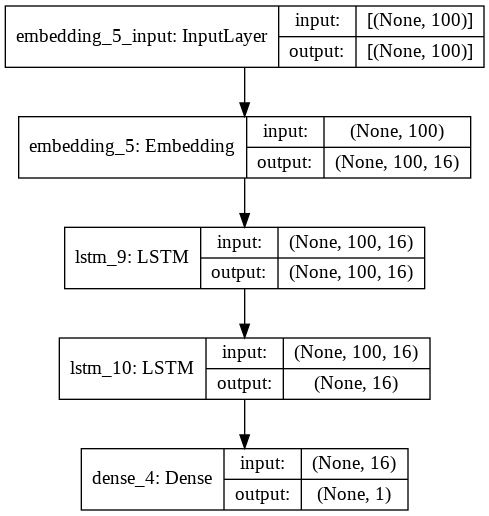

In [42]:
keras.utils.plot_model(md,show_shapes=True)

## 모델컴파일

In [43]:
md.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics='accuracy')

## 모델 훈련

In [44]:
cb_early = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)
cb_check = keras.callbacks.ModelCheckpoint(filepath='lstm_km.h5',save_best_only=True)

history = md.fit(x_tr_seq,y_tr,batch_size=64,epochs=100,
       callbacks=[cb_early,cb_check],
       validation_data=(x_ts_seq,y_ts))

Epoch 1/100
313/313 [==============================] - 9s 20ms/step - loss: 0.6279 - accuracy: 0.6237 - val_loss: 0.4770 - val_accuracy: 0.7737
Epoch 2/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4692 - accuracy: 0.7772 - val_loss: 0.4478 - val_accuracy: 0.7909
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4482 - accuracy: 0.7925 - val_loss: 0.4612 - val_accuracy: 0.7941
Epoch 4/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4398 - accuracy: 0.7970 - val_loss: 0.4708 - val_accuracy: 0.7802
Epoch 5/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4299 - accuracy: 0.8006 - val_loss: 0.4418 - val_accuracy: 0.7940
Epoch 6/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4267 - accuracy: 0.8051 - val_loss: 0.4349 - val_accuracy: 0.7979
Epoch 7/100
313/313 [==============================] - 5s 17ms/step - loss: 0.4220 - accuracy: 0.8067 - val_loss: 0.4287 - val_accuracy:

## 학습 곡선 - 손실 곡선, 정확도 곡선

In [46]:
hist = pd.DataFrame(history.history)
hist[:5]

,loss,accuracy,val_loss,val_accuracy
0,0.566774,0.6943,0.477013,0.77368
1,0.465275,0.7798,0.447774,0.79088
2,0.446294,0.7913,0.461205,0.79408
3,0.437242,0.7978,0.470769,0.78016
4,0.432103,0.7998,0.441793,0.79396


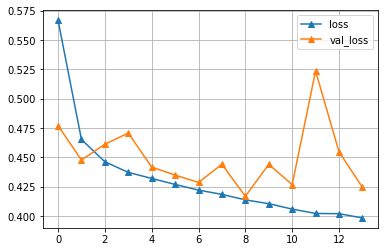

In [53]:
hist[['loss','val_loss']].plot(marker='^')
plt.grid()
plt.show()

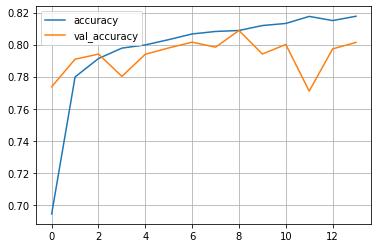

In [54]:
hist[['accuracy', 'val_accuracy']].plot()
plt.grid()
plt.show()

## 모델 평가

In [55]:
md.evaluate(x_val_seq,y_val)

157/157 [==============================] - 1s 6ms/step - loss: 0.4448 - accuracy: 0.7882


[0.4447523057460785, 0.7882000207901001]

------

# 모범답안

In [23]:
# IMDB data-set
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10_000)
#> 어휘 사전에서 자주 등장하는 단어 10,000개를 사용한 데이터 셋

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [27]:
x_train_full.shape,y_train_full.shape

((25000,), (25000,))

In [28]:
for i in range(5):
    print(len(x_train_full[i]))

218
189
141
550
147


In [29]:
np.unique(y_train_full,return_counts=True)

(array([0, 1]), array([12500, 12500]))

In [30]:
# 데이터정제
#> 샘플(영화 리뷰)들 마다 사용된 단어 수가 다르기 때문에 일정한 크기로 맞춰줄 필요가 있음
#-> 모든 샘플이 길이(단어 수)를 500개로 자르거나 패딩

x_train_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_train_full, maxlen=500)
x_test_seq = keras.preprocessing.sequence.pad_sequences(sequences=x_test, maxlen=500)

In [32]:
x_train_seq.shape, x_test_seq.shape

((25000, 500), (25000, 500))

In [33]:
# 전처리가 끝난 전체 훈련셋을 훈련/검증 셋으로 분리
x_train,x_vali,y_train,y_vali = train_test_split(x_train_seq,y_train_full,
                                                 test_size = 0.2,
                                                 stratify = y_train_full,
                                                 random_state = 42)

In [34]:
x_train.shape,x_vali.shape

((20000, 500), (5000, 500))

In [35]:
np.unique(y_train,return_counts=True)

(array([0, 1]), array([10000, 10000]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 16)           160000    
_________________________________________________________________
lstm_11 (LSTM)               (None, 500, 16)           2112      
_________________________________________________________________
lstm_12 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 164,241
Trainable params: 164,241
Non-trainable params: 0
_________________________________________________________________
None


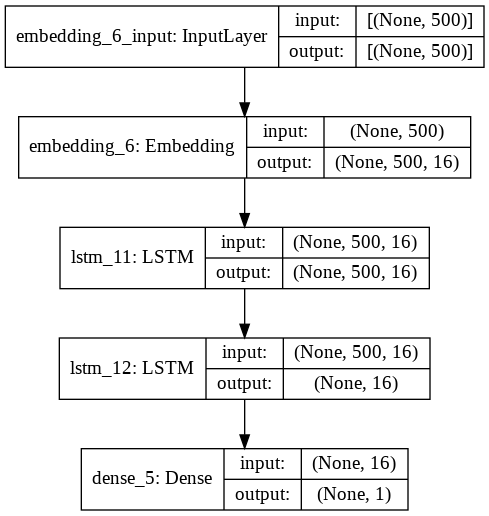

In [56]:
# LSTM 모델 생성

model = keras.Sequential()
model.add(keras.layers.Embedding(input_dim=10_000, output_dim=16, input_length=500)) #> embadding layer
model.add(keras.layers.LSTM(units=16,dropout=0.3,return_sequences=True)) #> LSTM layer
#> return_sequences = 순환층의 출력이 다른 순환층의 입력으로 사용될 때 'True'로 설정
model.add(keras.layers.LSTM(units=16,dropout=0.3)) #> LSTM layer 
model.add(keras.layers.Dense(units=1,activation='sigmoid')) #> Out-Put layer

print(model.summary())

keras.utils.plot_model(model,show_shapes=True)

In [58]:
# 모델 컴파일
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics='accuracy')

In [59]:
# 모델훈련
#> 콜백(조기 종료, 상태 저장)
early_stop_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('lstm2_model.h5', save_best_only=True)

#> 훈련
history1 = model.fit(x_train,y_train,batch_size=64,epochs=100,
                     callbacks=[early_stop_cb,checkpoint_cb],
                     validation_data = (x_vali,y_vali)) 

Epoch 1/100
313/313 [==============================] - 14s 37ms/step - loss: 0.5851 - accuracy: 0.6565 - val_loss: 0.3417 - val_accuracy: 0.8618
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.2851 - accuracy: 0.8907 - val_loss: 0.4090 - val_accuracy: 0.8560
Epoch 3/100
313/313 [==============================] - 11s 37ms/step - loss: 0.2313 - accuracy: 0.9124 - val_loss: 0.3151 - val_accuracy: 0.8872
Epoch 4/100
313/313 [==============================] - 11s 37ms/step - loss: 0.2066 - accuracy: 0.9230 - val_loss: 0.2757 - val_accuracy: 0.8872
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.1873 - accuracy: 0.9342 - val_loss: 0.3473 - val_accuracy: 0.8858
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 0.1756 - accuracy: 0.9362 - val_loss: 0.3821 - val_accuracy: 0.8742
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.1533 - accuracy: 0.9445 - val_loss: 0.3688 - val_ac

In [60]:
hist1 = pd.DataFrame(history1.history)

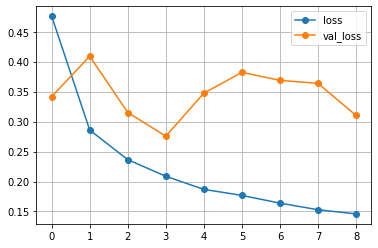

In [61]:
# 손실 곡선
hist1[['loss','val_loss']].plot(marker='o')
plt.grid()
plt.show()

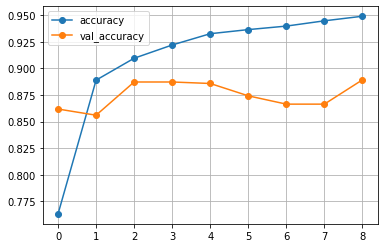

In [62]:
#  정확도 곡선
hist1[['accuracy','val_accuracy']].plot(marker='o')
plt.grid()
plt.show()

In [63]:
# 검증셋 평가
model.evaluate(x_vali,y_vali)

157/157 [==============================] - 2s 15ms/step - loss: 0.2757 - accuracy: 0.8872


[0.2756931781768799, 0.8871999979019165]

In [64]:
# 테스트 셋 평가
model.evaluate(x_test_seq,y_test)

782/782 [==============================] - 12s 15ms/step - loss: 0.2879 - accuracy: 0.8842


[0.28791242837905884, 0.8842399716377258]